# Độ chính xác (Accuracy)

Tỷ lệ phần trăm các dự đoán đúng.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Load dữ liệu

In [61]:
# load dữ liệu
data = pd.read_csv('kdd2004.csv')

# ánh xạ lại phân lớp mục tiêu thành 0 và 1

data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [62]:
data.shape # kích thước dữ liệu

(145751, 75)

In [63]:
data.target.value_counts() / len(data) # mục tiêu không cân bằng
# valuea_counts() trả về 1 chuổi chứa tần số của từng hàng riêng biệt trong khung dữ liệu

0    0.991108
1    0.008892
Name: target, dtype: float64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1), 
    data['target'],
    test_size = 0.3,
    random_state = 0
)
X_train.shape, X_test.shape
#train_test_split chia các mảng, ma trận thành các tập con kiểm tra và huấn luyện ngẫu nhiên

((102025, 74), (43726, 74))

## Baseline: dự đoán lớp đa số

In [65]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Huấn luyện mô hình học máy

### Random Forest

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_log_proba(X_train)[:,1]
y_test_rf = rf.predict_log_proba(X_test)[:,1]
#randomforestclassifier là 1 cộng cụ ước tính meta phù hợp với 1 số  phân loại cây quyết định trên các mẫu phụ khác nhau
# của tập dữ liệu và sử dụng tính trung bình để cải thiện độ chính xác dự đoán và kiểm soát độ khớp quá mức.
# predict_log_proba Ước tính trả về cho tất cả các lớp được sắp xếp theo nhãn của lớp

### Hồi quy Logistic 

In [67]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

## Độ chính xác

In [74]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))
# accuracy_score tính toán độ chính xác của tập hợp con

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9970040708045557


Căn cứ vào độ chính xác, có vẻ như các mô hình học máy chỉ tăng một chút chất lượng so với baseline. 

## Phần trăm nhóm thiểu số được phân loại đúng

In [ ]:
def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    minority_correct = np.sum(np.where((y_true==1)&(y_pred==1),1,0))
    return minority_correct / minority_total *100

In [71]:
print('Accuracy Baseline test: ', return_minority_perc(y_test, y_test_base))
print('Accuracy Random Forest test:', return_minority_perc(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', return_minority_perc(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.0
Accuracy Random Forest test: 60.24691358024692
Accuracy Logistic Regression test: 72.5925925925926


# Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Số trường hợp ở mỗi lớp


Precision, Recall và F-measure phụ thuộc vào ngưỡng xác suất được sử dụng để xác định kết quả phân lớp.

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

In [72]:
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test)))
print('Precision Logistic Regression test:', precision_score(y_test, logit.predict(X_test)))

Precision Baseline test:  0.0
Precision Random Forest test: 0.9959183673469387
Precision Logistic Regression test: 0.9363057324840764


## Recall

In [76]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.725925925925926


## F-measure/chỉ số F1 

In [78]:
print('F-measure Baseline test: ', f1_score(y_test, y_test_base, pos_label=1))
print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test), pos_label=1))
print('F-measure Logistic Regression test:', f1_score(y_test, logit.predict(X_test), pos_label=1))

F-measure Baseline test:  0.0
F-measure Random Forest test: 0.7507692307692309
F-measure Logistic Regression test: 0.8178025034770515


## Báo cáo phân loại đầu đủ

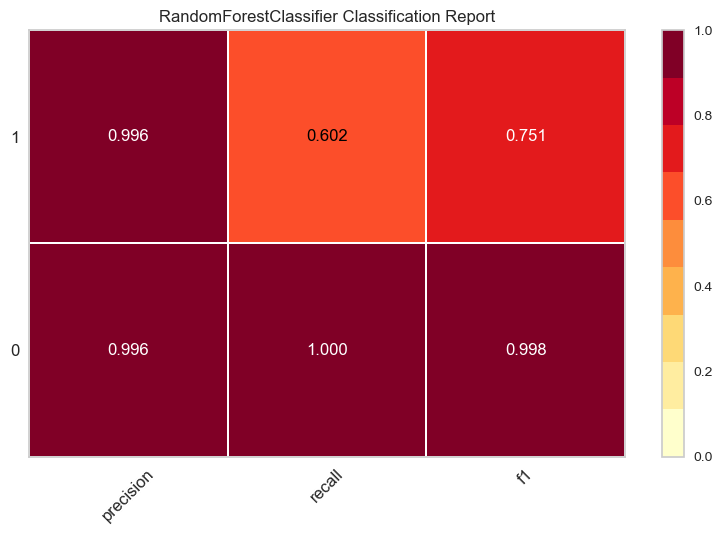

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [79]:
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)        # Khớp visualizer và mô hình
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show()                       # Hoàn thành và hiển thị kết quả

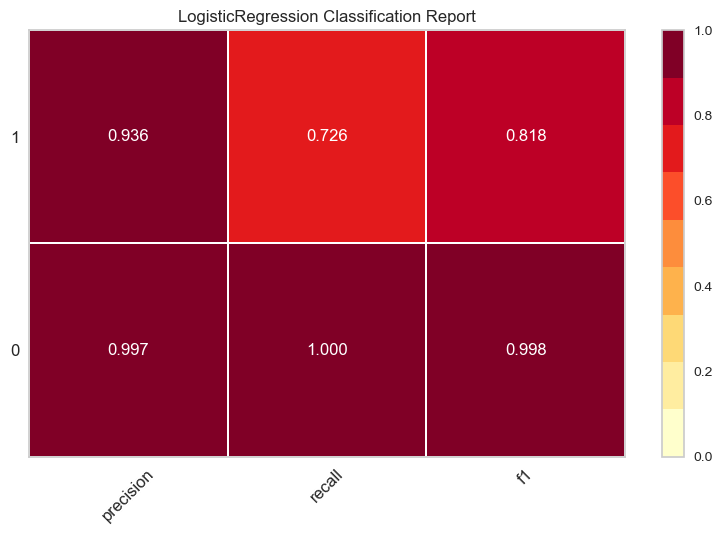

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [80]:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)        # Khớp visualizer và mô hình
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show() 

## Precision và Recall với ngưỡng xác suất

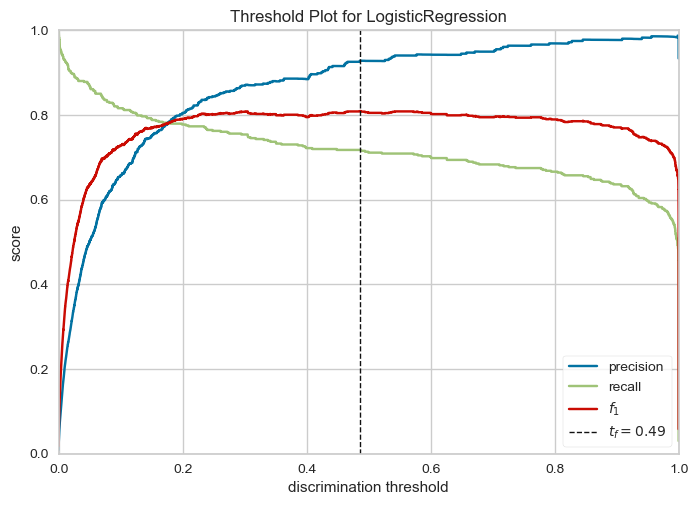

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [81]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Khớp visualizer và mô hình
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show()

# Ma trận nhầm lẫn, false positive rate (FPR) và false negative rate (FNR)

- **FPR** = fp / (tn + fp)

- **FNR** = fn / (tp + fn)


Ma trận nhầm lẫn, FPR và FNR phụ thuộc vào ngưỡng xác suất được sử dụng để xác đinh kết quả phân lớp.

In [82]:
from sklearn.metrics import confusion_matrix

## Ma trận nhầm lẫn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

TN | FP

FN | TP

### Baseline

In [83]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[43321,     0],
       [  405,     0]], dtype=int64)

### Random Forest

In [84]:
confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])

array([[43320,     1],
       [  161,   244]], dtype=int64)

### Hồi quy Logistic

In [85]:
confusion_matrix(y_test, logit.predict(X_test), labels=[0,1])

array([[43301,    20],
       [  111,   294]], dtype=int64)

## FPR và FNR

In [86]:
tn, fp, fn, tp =  confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

FPR = fp /(tn+fp)

FNR = fn/(tp+fn)

print('False Positive Rate, baseline: ',FPR )
print('False Negative Rate, baseline: ',FNR )

False Positive Rate, baseline:  0.0
False Negative Rate, baseline:  1.0


In [87]:
tn, fp, fn, tp =  confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

FPR = fp /(tn+fp)

FNR = fn/(tp+fn)

print('False Positive Rate, baseline: ',FPR )
print('False Negative Rate, baseline: ',FNR )

False Positive Rate, baseline:  2.3083492994159875e-05
False Negative Rate, baseline:  0.39753086419753086


In [88]:
tn, fp, fn, tp =  confusion_matrix(y_test, logit.predict(X_test), labels=[0,1]).ravel()

FPR = fp /(tn+fp)

FNR = fn/(tp+fn)

print('False Positive Rate, baseline: ',FPR )
print('False Negative Rate, baseline: ',FNR )

False Positive Rate, baseline:  0.0004616698598831975
False Negative Rate, baseline:  0.2740740740740741


## FPR và FNR với ngưỡng xác suất

In [89]:
threshoulds = np.linspace(0, 1, 100)
threshoulds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [91]:
fpr_ls = []
fnr_ls = []

probs = logit.predict_proba(X_test)[:,1]

for threshould in threshoulds:

    preds = np.where(probs >= threshould, 1, 0)

    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()

    FPR = fp/(tn+fp)

    FNR = fn/(tp+fn)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)

metrics = pd.concat([
    pd.Series(fpr_ls),
    pd.Series(fnr_ls)
], axis=1)

metrics.columns = ['fpr', 'fnr']
metrics.index = threshoulds

metrics.head()

,fpr,fnr
0.000000,1.000000,0.000000
0.010101,0.035918,0.069136
0.020202,0.019575,0.086420
0.030303,0.013135,0.101235
0.040404,0.009441,0.113580


Text(0.5, 1.0, 'FPR and FNR vs Discrisminant Threshould')

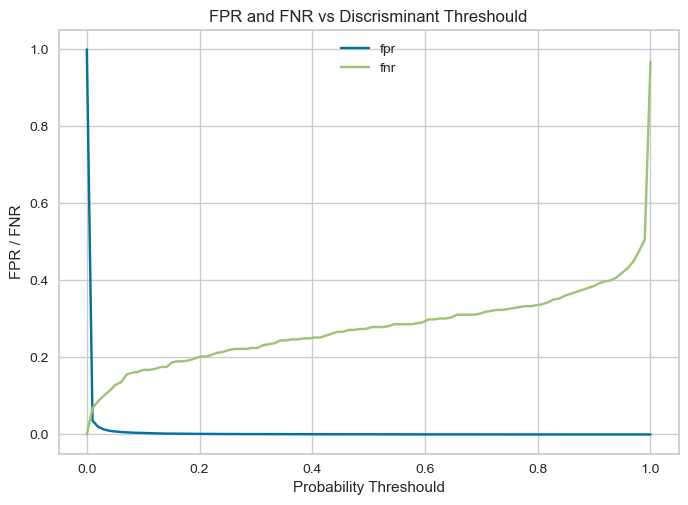

In [92]:
metrics.plot()
plt.xlabel('Probability Threshould')
plt.ylabel('FPR / FNR')
plt.title('FPR and FNR vs Discrisminant Threshould')


## Đường cong Precision-Recall

In [94]:
from sklearn.metrics import plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve

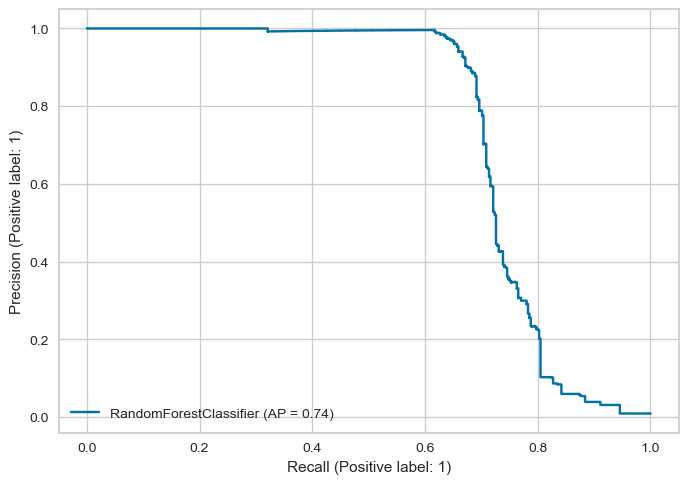

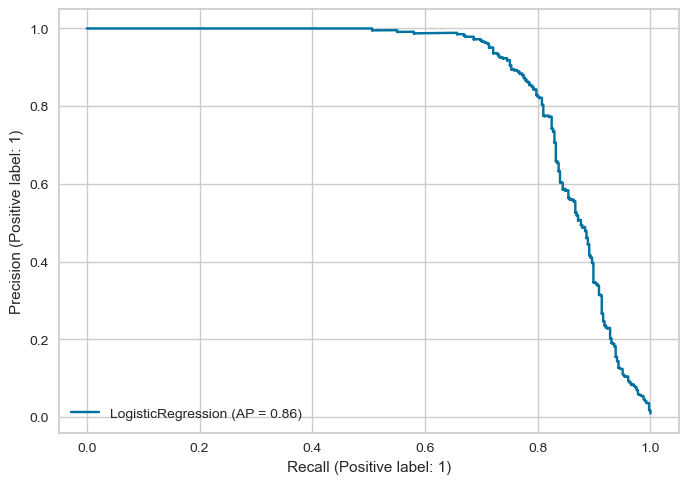

In [95]:
rf_disp = plot_precision_recall_curve(rf, X_test, y_test)
logit_disp = plot_precision_recall_curve(logit, X_test, y_test)

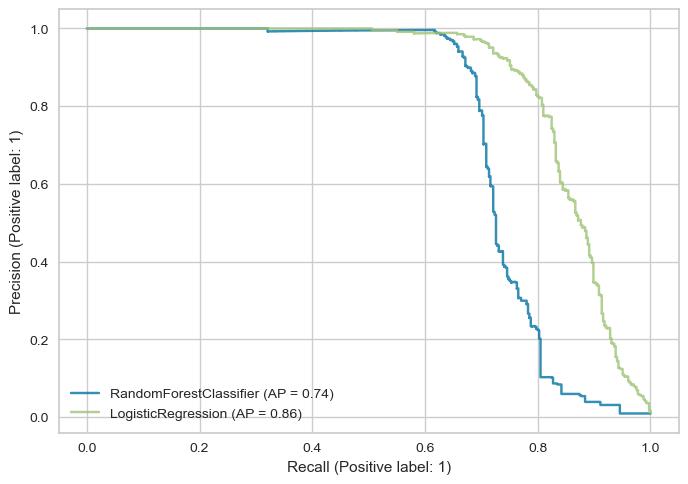

In [96]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

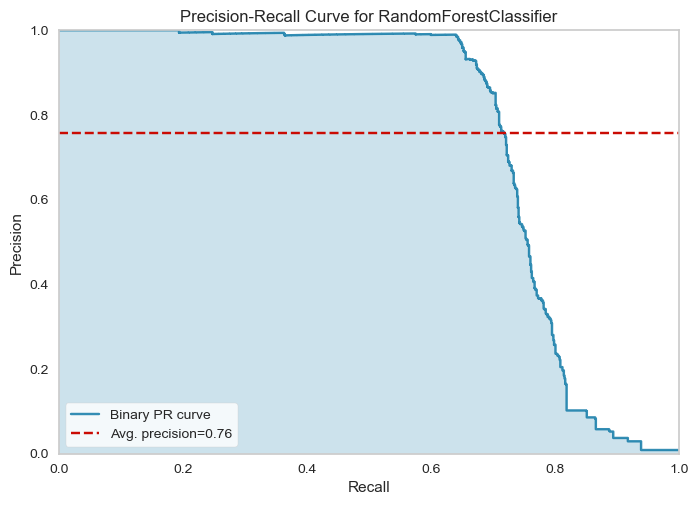

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [99]:
## VIẾT CODE Ở ĐÂY:
visualizer = PrecisionRecallCurve(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Khớp dữ liệu huấn luyện với visualizer
visualizer.score(X_train, y_train)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show() 

#  Độ chính xác cân bằng

Recall trung bình trên các lớp.

In [100]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

## Độ chính xác

In [101]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9970040708045557


## Độ chính xác cân bằng

- [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html)

In [102]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, Random Forest test:', balanced_accuracy_score(y_test, rf.predict(X_test)))
print('Balanced accuracy, Regression test:',  balanced_accuracy_score(y_test, logit.predict(X_test)))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, Random Forest test: 0.8012230261547375
Balanced accuracy, Regression test: 0.8627321280330214


## Recall ở mỗi phân lớp

In [103]:
print('Recall, class 0 and 1: ', recall_score(
    y_test, y_test_base, labels=[0,1], average=None))

print('Recall, class 0 and 1:', recall_score(
    y_test, rf.predict(X_test), labels=[0,1], average=None))

print('Recall, class 0 and 1:',  recall_score(
    y_test, logit.predict(X_test), labels=[0,1], average=None))

Recall, class 0 and 1:  [1. 0.]
Recall, class 0 and 1: [0.99997692 0.60246914]
Recall, class 0 and 1: [0.99953833 0.72592593]
